# Predictions for Eerie on March 1, 2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'prophet'

In [3]:
df = pd.read_csv('../data/cleaned.csv')


## Generate Prophet Model to Predict num_results

In [ ]:
df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)


15:28:22 - cmdstanpy - INFO - Chain [1] start processing
15:28:22 - cmdstanpy - INFO - Chain [1] done processing


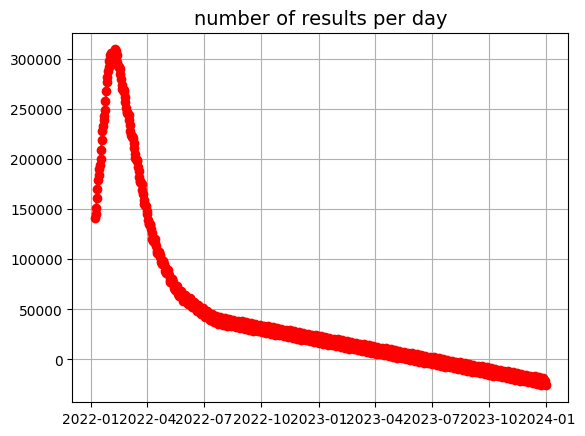

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# Predict March 1 2023 
forecast[forecast.ds == "2023-03-01"]['yhat']


418    16670.001593
Name: yhat, dtype: float64

## Generate Prophet Model to Predict num_hardmode

15:28:23 - cmdstanpy - INFO - Chain [1] start processing
15:28:23 - cmdstanpy - INFO - Chain [1] done processing


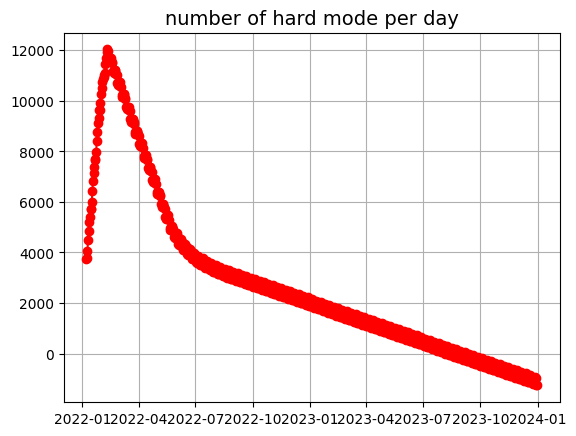

418    1677.402674
Name: yhat, dtype: float64

In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of hard mode per day', fontsize=14)
plt.grid(True)
plt.show()

# Predict March 1 2023

forecast[forecast.ds == "2023-03-01"]['yhat']


## Create Clustering

In [4]:
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occurrence:',
          cluster_data['word_occurrence'].mean())
    print('\n')


# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

NameError: name 'KMeans' is not defined

## Make Predictions on guesses of Eerie

In [1]:
from util import *

df_rf, df_lr = predict_word("eerie")
display(df_rf)
display(df_lr)


,word,word_score,word_occurrence,vowels,repeats,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,in1,in2,in3,in4,in5,in6,over6
0,eerie,2.117805,0.000573,4,2,0,0,4,5,0,4.107676,0.383843,5.144728,24.130176,35.931746,23.439444,9.41283,1.44876


,word,word_score,word_occurrence,vowels,repeats,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,in1,in2,in3,in4,in5,in6,over6
0,eerie,2.117805,0.000573,4,2,0,0,4,5,0,4.525076,0.163478,3.083151,15.316553,31.266144,29.935274,16.532435,3.860986
